In [1]:
from helpers import * 
from boundaries import *
from augment import *
from processor import *

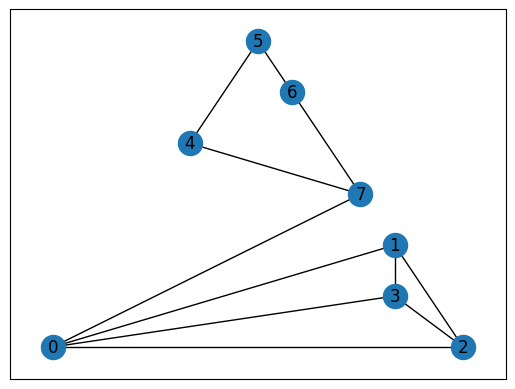

In [2]:
G_st = st_graph()   
plot_planar(G_st)

ic| cut_vertices: [7, 0]


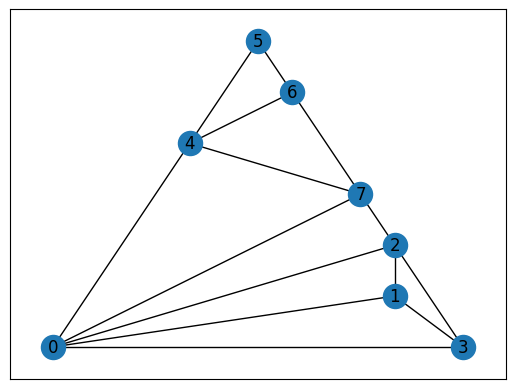

In [3]:
p = Processor(G_st)
p.augment()
pos = plot_planar(p.G, p.embed)

ic| tri.target_edge: (2, 3)
ic| 'neither same'
ic| len(l3_cycles): 8, m: 16, n: 9, m-n+1: 8


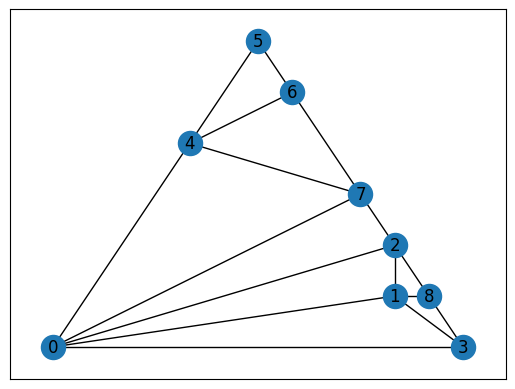

In [4]:
p.fix_separating_triangles()
plot_planar(p.G, p.s.embed)

In [5]:
p.find_cips()
p.b.cips

[[0, 3, 8, 2], [4, 5, 6]]

In [6]:
p.start_four_connect()

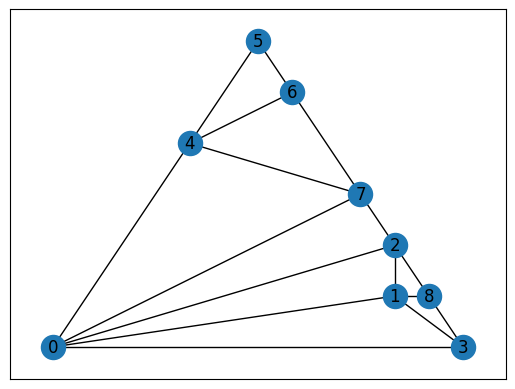

In [7]:
plot_planar(p.b.G, p.b.embed)

In [8]:
p.b.four_con


{0: CornerNode({'interior_nodes': [0, 3, 8], 'name': None, 'node': 9, 'location': None, 'mean_location': None}),
 1: CornerNode({'interior_nodes': [8, 2, 6], 'name': None, 'node': 10, 'location': None, 'mean_location': None}),
 2: CornerNode({'interior_nodes': [6, 5, 4], 'name': None, 'node': 11, 'location': None, 'mean_location': None}),
 3: CornerNode({'interior_nodes': [4, 0], 'name': None, 'node': 12, 'location': None, 'mean_location': None})}

In [9]:
p.b.locate_corner_nodes()

In [10]:
p.b.four_connect()

ic| 'Passes planarity check'


In [11]:
p.b.embed

{0: array([-1.        , -0.36206897]),
 1: array([ 0.37931034, -0.22413793]),
 2: array([ 0.37931034, -0.0862069 ]),
 3: array([ 0.65517241, -0.36206897]),
 4: array([-0.44827586,  0.18965517]),
 5: array([-0.17241379,  0.46551724]),
 6: array([-0.03448276,  0.32758621]),
 7: array([0.24137931, 0.05172414]),
 8: array([ 0.51724138, -0.22413793]),
 9: array([ 0.05747126, -1.31609195]),
 10: array([1.28735632, 0.00574713]),
 11: array([-0.2183908 ,  1.32758621]),
 12: array([-1.72413793, -0.0862069 ])}

In [12]:
type(p.b.embed[0])

numpy.ndarray

In [13]:
type(np.array(p.b.embed[11]))

numpy.ndarray

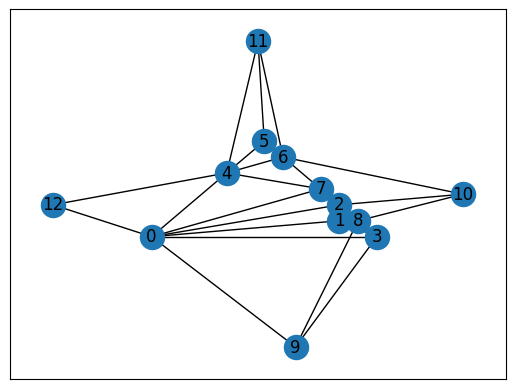

In [14]:
plot_planar(p.b.G, p.b.embed)

## scratch work 

In [15]:
p.b.locate_corner_nodes()
p.b.four_con

{0: CornerNode({'interior_nodes': [0, 3, 8], 'name': 'south', 'node': 9, 'location': (0.057471264367816056, -1.3160919540229885), 'mean_location': (0.057471264367816056, -0.3160919540229885)}),
 1: CornerNode({'interior_nodes': [8, 2, 6], 'name': 'east', 'node': 10, 'location': (1.2873563218390804, 0.005747126436781602), 'mean_location': (0.28735632183908044, 0.005747126436781602)}),
 2: CornerNode({'interior_nodes': [6, 5, 4], 'name': 'north', 'node': 11, 'location': (-0.21839080459770113, 1.3275862068965518), 'mean_location': (-0.21839080459770113, 0.32758620689655177)}),
 3: CornerNode({'interior_nodes': [4, 0], 'name': 'west', 'node': 12, 'location': (-1.7241379310344827, -0.08620689655172414), 'mean_location': (-0.7241379310344828, -0.08620689655172414)})}

In [16]:
p.b.four_con

{0: CornerNode({'interior_nodes': [0, 3, 8], 'name': 'south', 'node': 9, 'location': (0.057471264367816056, -1.3160919540229885), 'mean_location': (0.057471264367816056, -0.3160919540229885)}),
 1: CornerNode({'interior_nodes': [8, 2, 6], 'name': 'east', 'node': 10, 'location': (1.2873563218390804, 0.005747126436781602), 'mean_location': (0.28735632183908044, 0.005747126436781602)}),
 2: CornerNode({'interior_nodes': [6, 5, 4], 'name': 'north', 'node': 11, 'location': (-0.21839080459770113, 1.3275862068965518), 'mean_location': (-0.21839080459770113, 0.32758620689655177)}),
 3: CornerNode({'interior_nodes': [4, 0], 'name': 'west', 'node': 12, 'location': (-1.7241379310344827, -0.08620689655172414), 'mean_location': (-0.7241379310344828, -0.08620689655172414)})}

In [17]:
def assign_directions_orig(coords):
    north = south = east = west = None

    for coord in coords:
        x, y = coord
        ic(f"NEW COORD: {coord}")
        if north is None or y > north[1]:
            north = coord
            ic(north)
        if south is None or y < south[1]:
            south = coord
            ic(south)
        if east is None or x > east[0]:
            east = coord
            ic(east)
        if west is None or x < west[0]:
            west = coord
            ic(west)

    directions = {'north': north, 'south': south, 'east': east, 'west': west}
    return directions

In [18]:
coords = [v.mean_location for v in p.b.four_con.values()]
# coords = [(0, 10), (5, 0), (-8, 0), (0, -2)]
dir_data  = assign_directions_orig(coords)
dir_data

ic| f"NEW COORD: {coord}": 'NEW COORD: (0.057471264367816056, -0.3160919540229885)'
ic| north: (0.057471264367816056, -0.3160919540229885)
ic| south:

 (0.057471264367816056, -0.3160919540229885)
ic| east: (0.057471264367816056, -0.3160919540229885)
ic| west: (0.057471264367816056, -0.3160919540229885)
ic| f"NEW COORD: {coord}": 'NEW COORD: (0.28735632183908044, 0.005747126436781602)'
ic| north: (0.28735632183908044, 0.005747126436781602)
ic| east: (0.28735632183908044, 0.005747126436781602)
ic| f"NEW COORD: {coord}": 'NEW COORD: (-0.21839080459770113, 0.32758620689655177)'
ic| north: (-0.21839080459770113, 0.32758620689655177)
ic| west: (-0.21839080459770113, 0.32758620689655177)
ic| f"NEW COORD: {coord}": 'NEW COORD: (-0.7241379310344828, -0.08620689655172414)'
ic| west: (-0.7241379310344828, -0.08620689655172414)


{'north': (-0.21839080459770113, 0.32758620689655177),
 'south': (0.057471264367816056, -0.3160919540229885),
 'east': (0.28735632183908044, 0.005747126436781602),
 'west': (-0.7241379310344828, -0.08620689655172414)}

In [19]:
p.b.four_con[get_key_by_value(p.b.four_con, dir_data["north"], object=True)].name 

'north'

In [20]:
tuple(find_point_along_vector((3,4), "east", 1))

(4, 4)

In [21]:
def assign_location(key):
    buffer = 1
    item = p.b.four_con[get_key_by_value(p.b.four_con, dir_data[key], object=True)]
    item.name = key
    item.location = find_point_along_vector(item.mean_location, key, buffer)


In [22]:
p.b.four_con[get_key_by_value(p.b.four_con, dir_data["west"], object=True)]

CornerNode({'interior_nodes': [4, 0], 'name': 'west', 'node': 12, 'location': (-1.7241379310344827, -0.08620689655172414), 'mean_location': (-0.7241379310344828, -0.08620689655172414)})

In [23]:
type(p.b.four_con[0].mean_location)

tuple

In [24]:
type(dir_data["west"])

tuple

In [25]:
[9, 10, 15] == 10

False

In [26]:
p.b.four_con[0].interior_nodes

[0, 3, 8]

In [27]:
dir_data

{'north': (-0.21839080459770113, 0.32758620689655177),
 'south': (0.057471264367816056, -0.3160919540229885),
 'east': (0.28735632183908044, 0.005747126436781602),
 'west': (-0.7241379310344828, -0.08620689655172414)}

In [28]:
for k, v in dir_data.values():
    print(v)

0.32758620689655177
-0.3160919540229885
0.005747126436781602
-0.08620689655172414


In [29]:
for k, v in dir_data.items():
    ic(v)
    item = p.b.four_con[get_key_by_value(p.b.four_con, v, object=True)]
    ic(k)
    assign_location(k)

ic| v: (-0.21839080459770113, 0.32758620689655177)
ic| k: 'north'
ic| v: (0.057471264367816056, -0.3160919540229885)
ic| k: 'south'
ic| v: (0.28735632183908044, 0.005747126436781602)
ic| k: 'east'
ic| v: (-0.7241379310344828, -0.08620689655172414)
ic| k: 'west'


In [30]:
[0.05747126, -1.31609195] == (0.28735632183908044, 0.005747126436781602)

False

In [31]:
p.b.four_con

{0: CornerNode({'interior_nodes': [0, 3, 8], 'name': 'south', 'node': 9, 'location': (0.057471264367816056, -1.3160919540229885), 'mean_location': (0.057471264367816056, -0.3160919540229885)}),
 1: CornerNode({'interior_nodes': [8, 2, 6], 'name': 'east', 'node': 10, 'location': (1.2873563218390804, 0.005747126436781602), 'mean_location': (0.28735632183908044, 0.005747126436781602)}),
 2: CornerNode({'interior_nodes': [6, 5, 4], 'name': 'north', 'node': 11, 'location': (-0.21839080459770113, 1.3275862068965518), 'mean_location': (-0.21839080459770113, 0.32758620689655177)}),
 3: CornerNode({'interior_nodes': [4, 0], 'name': 'west', 'node': 12, 'location': (-1.7241379310344827, -0.08620689655172414), 'mean_location': (-0.7241379310344828, -0.08620689655172414)})}

In [32]:
# Extract coordinates and labels
x_values = [coord[0] for coord in dir_data.values()]
y_values = [coord[1] for coord in dir_data.values()]
labels = list(dir_data.keys())

# Create scatter plot
fig = go.Figure(data=go.Scatter(x=x_values, y=y_values, mode='markers', text=labels))

# Update layout
fig.update_layout(title='Cardinal Directions Plot', xaxis_title='X-axis', yaxis_title='Y-axis')

# Show plot
fig.show()